## Experimental Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import csv

csv.field_size_limit(sys.maxsize)

# API scrape 
from psaw import PushshiftAPI

# Basic libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Natural Language Processing
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix


In [2]:
fake_news = pd.read_csv("/Users/rossheaney/Desktop/Workspace/FourthYear/FYP/FakeNewsPrototype/Data/fake.csv", engine='python')
real_news = pd.read_csv("/Users/rossheaney/Desktop/Workspace/FourthYear/FYP/FakeNewsPrototype/Data/real_news.csv", engine='python')

In [3]:
print(fake_news.shape)
print(real_news.shape)

(18001, 699)
(15712, 11)


In [4]:
print(list(fake_news.columns))
print(list(real_news.columns))
#Could possibly be an error here..... I have no idea why it's outputting it like that

['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text', 'language', 'crawled', 'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score', 'main_img_url', 'replies_count', 'participants_count', 'likes', 'comments', 'shares', 'type', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69',

In [5]:

real_news2 = real_news[['title', 'content', 'publication']]
real_news2['label'] = 'real'
real_news2.head(15)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,content,publication,label
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,New York Times,real
1,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",New York Times,real
2,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,New York Times,real
3,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",New York Times,real
4,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,New York Times,real
5,"Among Travelers and Commuters, the Homeless St...",Wilson Silva said he knew the homeless situati...,New York Times,real
6,Bus Bombing in Jerusalem Wounds 21 - The New Y...,JERUSALEM — A bomb exploded on a bus in Jer...,New York Times,real
7,Syria Cease-Fire Crumbles as Bombings Kill Doz...,"BEIRUT, Lebanon — For 38 straight days, the...",New York Times,real
8,Iceland’s Water Cure - The New York Times,"On a frigid February day in Reykjavik, I stood...",New York Times,real
9,"Get to Know the Historical Figures on the $5, ...",WASHINGTON — The Treasury Department announ...,New York Times,real


In [6]:
fake_news2 = fake_news[['title', 'text','site_url']]
fake_news2['label'] = 'fake'
fake_news2.head(15)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,text,site_url,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,fake
5,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,100percentfedup.com,fake
6,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup.com,fake
7,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup.com,fake
8,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,100percentfedup.com,fake
9,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,100percentfedup.com,fake


In [7]:
# let's rename the features in our datasets to be the same
newlabels = ['title', 'content', 'publication', 'label']
real_news2.columns = newlabels
fake_news2.columns = newlabels

# let's concatenate the dataframes
frames = [fake_news2, real_news2]
news_dataset = pd.concat(frames)
news_dataset


,title,content,publication,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,fake
5,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,100percentfedup.com,fake
6,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup.com,fake
7,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup.com,fake
8,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,100percentfedup.com,fake
9,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,100percentfedup.com,fake


In [8]:
#Convert this to a csv file 
news_dataset.to_csv("combined_news.csv", encoding='utf-8', index=False)

In [9]:
# Lets get some code up for a bar plot
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

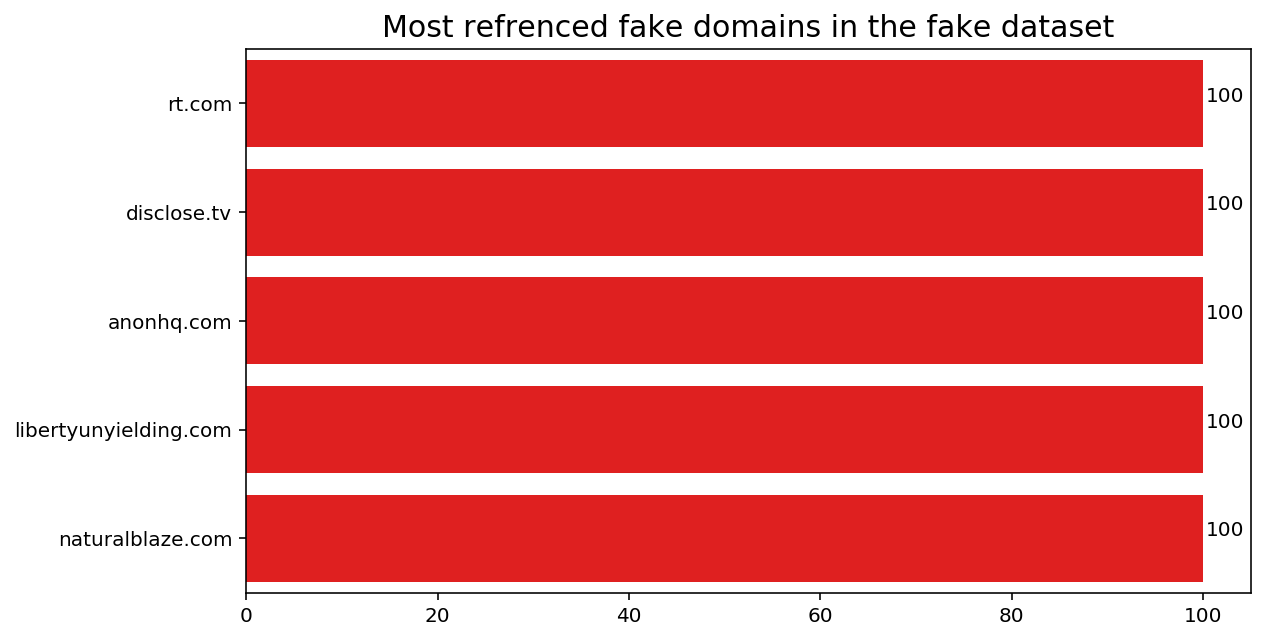

In [10]:
# I want to see the top fake domains for the fake news 
#I need to fix the problem with this one
df_fake_domains = fake_news['site_url'].value_counts()
df_fake_domains = df_fake_domains.sort_values(ascending=False).head(5)

#Set the Y value

df_fake_domain_index = list(df_fake_domains.index)

#Call our bar plot
bar_plot(df_fake_domains.values, df_fake_domain_index, 'Most refrenced fake domains in the fake dataset', 'r')

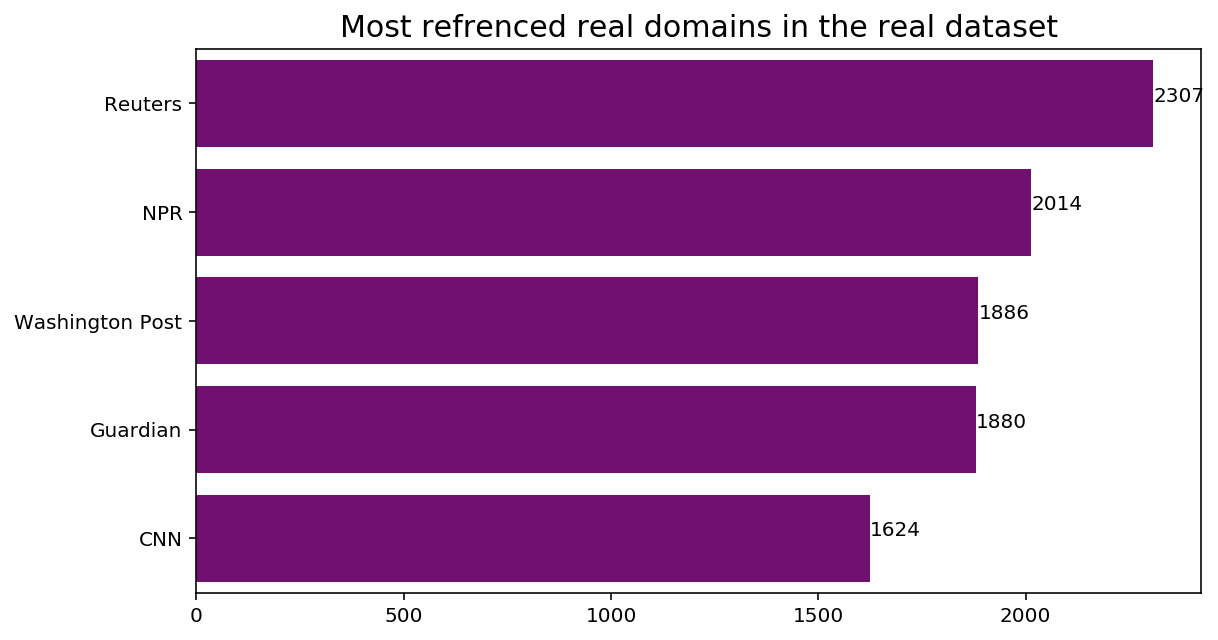

In [11]:
# Lets see the top refrenced domains for the real news.

df_real_domains = real_news['publication'].value_counts()
df_real_domains = df_real_domains.sort_values(ascending=False).head(5)

#Set the Y value

df_real_domain_index = list(df_real_domains.index)

#Call our bar plot
bar_plot(df_real_domains.values, df_real_domain_index, 'Most refrenced real domains in the real dataset', 'purple')

In [12]:
  #Lets get a baseline score
news_dataset['title'].value_counts(normalize=True)

US                                                                                                                                                                                                                                              0.000583
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                                                                                                                                              0.000240
“If Trump Loses, I’m Grabbing My Musket”: Former Congressman Ready to Go Full Revolution                                                                                                                                                        0.000171
Let’s Be Clear – A Vote For Warmonger Hillary Clinton Is A Vote For World War 3                                                                                                                                                                 0.000171
If H